In [1]:
import numpy as np
from floris import FlorisModel
import matplotlib.pyplot as plt
import timerit

# input_file = "inputs/jensen.yaml"
input_file = "inputs/cc.yaml"
n_turbines = 128
n_findex = 20
turbine_scale = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])
findex_scale = np.array([1, 2, 4, 8, 16, 32, 64, 128, 256])

N = 5

# FlorisModel.set

## Turbine scaling

In [2]:
fmodel = FlorisModel(input_file)
fmodel.set(
    wind_directions=np.array(n_findex * [270]),
    wind_speeds=np.array(n_findex * [10]),
    turbulence_intensities=np.array(n_findex * [0.06]),
)

ti = timerit.Timerit(N, bestof=3, verbose=2)
set_turbine_times = np.zeros_like(turbine_scale)

for i, t in enumerate(turbine_scale):
    for timer in ti.reset(str(t)):
        with timer:
            fmodel.set(
                layout_x=np.array([tt * 1000 for tt in range(t)]),
                layout_y=np.array(t * [0]),
            )
    set_turbine_times[i] = ti.min()

Timed 1 for: 5 loops, best of 3
    time per loop: best=21.200 ms, mean=21.277 ± 0.1 ms
Timed 2 for: 5 loops, best of 3
    time per loop: best=28.758 ms, mean=29.614 ± 0.9 ms
Timed 4 for: 5 loops, best of 3
    time per loop: best=46.927 ms, mean=47.429 ± 0.5 ms
Timed 8 for: 5 loops, best of 3
    time per loop: best=80.785 ms, mean=81.515 ± 0.7 ms
Timed 16 for: 5 loops, best of 3
    time per loop: best=147.176 ms, mean=149.209 ± 2.0 ms
Timed 32 for: 5 loops, best of 3
    time per loop: best=280.737 ms, mean=282.400 ± 1.7 ms
Timed 64 for: 5 loops, best of 3
    time per loop: best=545.183 ms, mean=563.457 ± 18.3 ms
Timed 128 for: 5 loops, best of 3
    time per loop: best=1.002 s, mean=1.011 ± 0.0 s
Timed 256 for: 5 loops, best of 3
    time per loop: best=2.025 s, mean=2.074 ± 0.0 s


## Findex scaling

In [3]:
fmodel = FlorisModel(input_file)
fmodel.set(
    layout_x=np.array([tt * 1000 for tt in range(n_turbines)]),
    layout_y=np.array(n_turbines * [0]),
)

ti = timerit.Timerit(N, bestof=3, verbose=2)
set_findex_times = np.zeros_like(findex_scale)

for i, t in enumerate(findex_scale):
    for timer in ti.reset(str(t)):
        with timer:
            fmodel.set(
                wind_directions=np.array(t * [270]),
                wind_speeds=np.array(t * [10]),
                turbulence_intensities=np.array(t * [0.06]),
            )
    set_findex_times[i] = ti.min()

Timed 1 for: 5 loops, best of 3
    time per loop: best=997.110 ms, mean=997.452 ± 0.3 ms
Timed 2 for: 5 loops, best of 3
    time per loop: best=1.011 s, mean=1.015 ± 0.0 s
Timed 4 for: 5 loops, best of 3
    time per loop: best=0.998 s, mean=1.012 ± 0.0 s
Timed 8 for: 5 loops, best of 3
    time per loop: best=997.901 ms, mean=998.035 ± 0.1 ms
Timed 16 for: 5 loops, best of 3
    time per loop: best=1.009 s, mean=1.011 ± 0.0 s
Timed 32 for: 5 loops, best of 3
    time per loop: best=1.008 s, mean=1.015 ± 0.0 s
Timed 64 for: 5 loops, best of 3
    time per loop: best=1.035 s, mean=1.036 ± 0.0 s
Timed 128 for: 5 loops, best of 3
    time per loop: best=1.041 s, mean=1.041 ± 0.0 s
Timed 256 for: 5 loops, best of 3
    time per loop: best=1.035 s, mean=1.046 ± 0.0 s


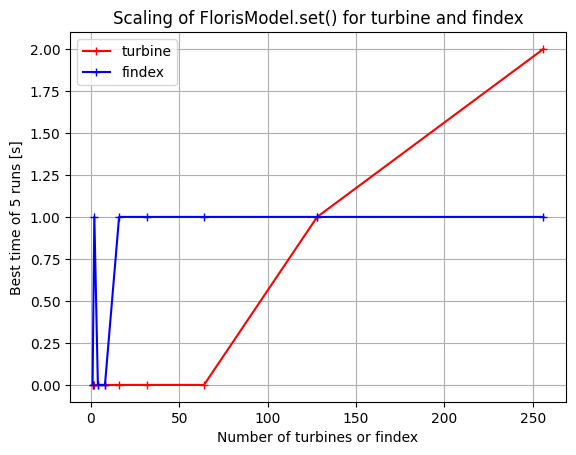

In [11]:
plt.figure()
plt.title("Scaling of FlorisModel.set() for turbine and findex")
plt.xlabel("Number of turbines or findex")
plt.ylabel(f"Best time of {N} runs [s]")
plt.plot(turbine_scale, set_turbine_times, marker="+", label="turbine", color="r")
plt.plot(findex_scale, set_findex_times, marker="+", label="findex", color="b")
plt.grid()
plt.legend()

The turbine scaling for `FlorisModel.set` is poor, but the findex scaling is constant.

# FlorisModel.run

In [5]:
fmodel = FlorisModel(input_file)
fmodel.set(
    wind_directions=np.array(n_findex * [270]),
    wind_speeds=np.array(n_findex * [10]),
    turbulence_intensities=np.array(n_findex * [0.06]),
)

ti = timerit.Timerit(N, bestof=3, verbose=2)
run_turbine_times = np.zeros_like(turbine_scale)

for i, t in enumerate(turbine_scale):
    fmodel.set(
        layout_x=np.array([tt * 1000 for tt in range(t)]),
        layout_y=np.array(t * [0]),
    )
    for timer in ti.reset(str(t)):
        with timer:
            fmodel.run()

    run_turbine_times[i] = ti.min()

Timed 1 for: 5 loops, best of 3
    time per loop: best=1.146 ms, mean=1.157 ± 0.0 ms
Timed 2 for: 5 loops, best of 3
    time per loop: best=2.336 ms, mean=2.338 ± 0.0 ms
Timed 4 for: 5 loops, best of 3
    time per loop: best=5.092 ms, mean=5.115 ± 0.0 ms
Timed 8 for: 5 loops, best of 3
    time per loop: best=11.435 ms, mean=11.829 ± 0.4 ms
Timed 16 for: 5 loops, best of 3
    time per loop: best=51.784 ms, mean=51.882 ± 0.1 ms
Timed 32 for: 5 loops, best of 3
    time per loop: best=158.903 ms, mean=159.329 ± 0.4 ms
Timed 64 for: 5 loops, best of 3
    time per loop: best=602.308 ms, mean=604.943 ± 2.6 ms
Timed 128 for: 5 loops, best of 3
    time per loop: best=3.088 s, mean=3.104 ± 0.0 s
Timed 256 for: 5 loops, best of 3
    time per loop: best=20.248 s, mean=20.297 ± 0.0 s


In [6]:
fmodel = FlorisModel(input_file)
fmodel.set(
    layout_x=np.array([tt * 1000 for tt in range(n_turbines)]),
    layout_y=np.array(n_turbines * [0]),
)

ti = timerit.Timerit(N, bestof=3, verbose=2)
run_findex_times = np.zeros_like(findex_scale)

for i, t in enumerate(findex_scale):
    for timer in ti.reset(str(t)):
        fmodel.set(
            wind_directions=np.array(t * [270]),
            wind_speeds=np.array(t * [10]),
            turbulence_intensities=np.array(t * [0.06]),
        )
        with timer:
            fmodel.run()
    run_findex_times[i] = ti.min()

Timed 1 for: 5 loops, best of 3
    time per loop: best=409.152 ms, mean=414.765 ± 5.6 ms
Timed 2 for: 5 loops, best of 3
    time per loop: best=766.575 ms, mean=769.147 ± 2.6 ms
Timed 4 for: 5 loops, best of 3
    time per loop: best=1.181 s, mean=1.217 ± 0.0 s
Timed 8 for: 5 loops, best of 3
    time per loop: best=1.571 s, mean=1.576 ± 0.0 s
Timed 16 for: 5 loops, best of 3
    time per loop: best=2.666 s, mean=2.690 ± 0.0 s
Timed 32 for: 5 loops, best of 3
    time per loop: best=4.921 s, mean=4.980 ± 0.1 s
Timed 64 for: 5 loops, best of 3
    time per loop: best=9.648 s, mean=9.734 ± 0.1 s
Timed 128 for: 5 loops, best of 3
    time per loop: best=18.646 s, mean=18.781 ± 0.1 s
Timed 256 for: 5 loops, best of 3
    time per loop: best=51.130 s, mean=51.275 ± 0.1 s


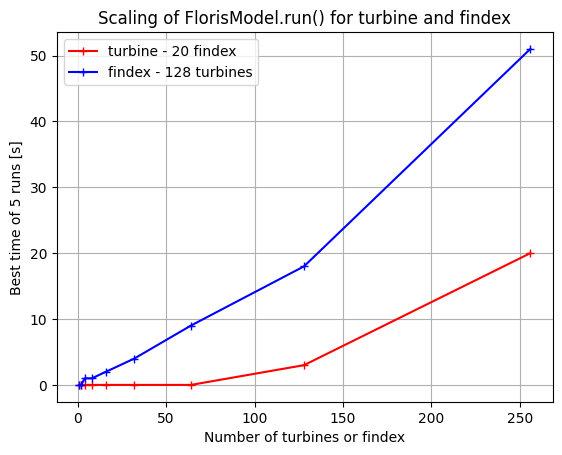

In [12]:
plt.figure()
plt.title("Scaling of FlorisModel.run() for turbine and findex")
plt.xlabel("Number of turbines or findex")
plt.ylabel(f"Best time of {N} runs [s]")
plt.plot(turbine_scale, run_turbine_times, marker="+", label="turbine - 20 findex", color="r")
plt.plot(findex_scale, run_findex_times, marker="+", label="findex - 128 turbines", color="b")
plt.grid()
plt.legend()

# CC Solver

Below is a line by line account of the CC solver with most of the 0-impact lines removed.
The problem size is 128 turbines x 20 findex.

```
Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
   453                                           @profile
   454                                           def cc_solver(
   455                                               farm: Farm,
   456                                               flow_field: FlowField,
   457                                               grid: TurbineGrid,
   458                                               model_manager: WakeModelManager
   459                                           ) -> None:

... Removed ...

   486                                               # Calculate the velocity deficit sequentially from upstream to downstream turbines
   487       129         38.0      0.3      0.0      for i in range(grid.n_turbines):

... Removed ...

   601                                                   # Model calculations
   602                                                   # NOTE: exponential
   603       384     121950.0    317.6      4.0          deflection_field = model_manager.deflection_model.function(
   604       128         12.0      0.1      0.0              x_i,
   605       128          8.0      0.1      0.0              y_i,
   606       128         10.0      0.1      0.0              effective_yaw_i,
   607       128          9.0      0.1      0.0              turbulence_intensity_i,
   608       128         45.0      0.4      0.0              turb_Cts[:, i:i+1],
   609       128         15.0      0.1      0.0              rotor_diameter_i,
   610       128         16.0      0.1      0.0              **deflection_model_args,
   611                                                   )

... Removed ...

   643       384    2305451.0   6003.8     76.5          turb_u_wake, Ctmp = model_manager.velocity_model.function(
   644       128         17.0      0.1      0.0              i,
   645       128          9.0      0.1      0.0              x_i,
   646       128         17.0      0.1      0.0              y_i,
   647       128          9.0      0.1      0.0              z_i,
   648       128         27.0      0.2      0.0              u_i,
   649       128         13.0      0.1      0.0              deflection_field,
   650       128         15.0      0.1      0.0              yaw_angle_i,
   651       128         14.0      0.1      0.0              turbine_turbulence_intensity,
   652       128          8.0      0.1      0.0              turb_Cts,
   653       128         64.0      0.5      0.0              farm.rotor_diameters_sorted[:, :, None, None],
   654       128         15.0      0.1      0.0              turb_u_wake,
   655       128          8.0      0.1      0.0              Ctmp,
   656       128         10.0      0.1      0.0              **deficit_model_args,
   657                                                   )
   658                                           
   659       256      34394.0    134.4      1.1          wake_added_turbulence_intensity = model_manager.turbulence_model.function(
   660       128         23.0      0.2      0.0              ambient_turbulence_intensities,
   661       128         10.0      0.1      0.0              grid.x_sorted,
   662       128         14.0      0.1      0.0              x_i,
   663       128          7.0      0.1      0.0              rotor_diameter_i,
   664       128         17.0      0.1      0.0              turb_aIs
   665                                                   )

... Removed ...
```

We can see that the `velocity_model` is the most expensive part of the solver.
Next is a line by line account of the `CumulativeGaussCurlVelocityDeficit.function` routine.

```
      Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    58                                               @profile
    59                                               def function(
    60                                                   self,
    61                                                   ii: int,
    62                                                   x_i: np.ndarray,
    63                                                   y_i: np.ndarray,
    64                                                   z_i: np.ndarray,
    65                                                   u_i: np.ndarray,
    66                                                   deflection_field: np.ndarray,
    67                                                   yaw_i: np.ndarray,
    68                                                   turbulence_intensity: np.ndarray,
    69                                                   ct: np.ndarray,
    70                                                   turbine_diameter: np.ndarray,
    71                                                   turb_u_wake: np.ndarray,
    72                                                   Ctmp: np.ndarray,
    73                                                   # enforces the use of the below as keyword arguments and adherence to the
    74                                                   # unpacking of the results from prepare_function()
    75                                                   *,
    76                                                   x: np.ndarray,
    77                                                   y: np.ndarray,
    78                                                   z: np.ndarray,
    79                                                   u_initial: np.ndarray,
    80                                               ) -> None:

... Removed ...

   132      8001      65938.0      8.2      2.8              delta_x_m = x - x_coord_m
   133                                           
   134     16002     354048.0     22.1     14.8              sigma_i = wake_expansion(
   135      8001        756.0      0.1      0.0                  delta_x_m,
   136      8001       2218.0      0.3      0.1                  turbine_Ct[:, m:m+1],
   137      8001       1923.0      0.2      0.1                  turbine_ti[:, m:m+1],
   138      8001       1878.0      0.2      0.1                  turbine_diameter[:, m:m+1],
   139      8001        804.0      0.1      0.0                  self.a_s,
   140      8001        743.0      0.1      0.0                  self.b_s,
   141      8001        651.0      0.1      0.0                  self.c_s1,
   142      8001        666.0      0.1      0.0                  self.c_s2,
   143                                                       )
   144                                           
   145      8001     121726.0     15.2      5.1              S_i = sigma_n ** 2 + sigma_i ** 2
   146                                           
   147      8001     197781.0     24.7      8.2              Y_i = (y_i_loc - y_coord_m - deflection_field) ** 2 / (2 * S_i)
   148      8001     116131.0     14.5      4.8              Z_i = (z_i_loc - z_coord_m) ** 2 / (2 * S_i)
   149                                           
   150      8001    1191927.0    149.0     49.7              lbda = 1.0 * sigma_i ** 2 / S_i * np.exp(-Y_i) * np.exp(-Z_i)
   151                                           
   152      8001     143665.0     18.0      6.0              sum_lbda = sum_lbda + lbda * (Ctmp[m] / u_initial)
   153                                           
   154                                                   # Vectorized version of sum_lbda calc; has issues with y_coord (needs to be
   155                                                   # down-selected appropriately. Prelim. timings show vectorized form takes
   156                                                   # longer than for loop.)
   157                                                   # if ii >= 2:
   158                                                   #     S = sigma_n ** 2 + sigma_i[0:ii-1, :, :, :, :, :] ** 2
   159                                                   #     Y = (y_i_loc - y_coord - deflection_field) ** 2 / (2 * S)
   160                                                   #     Z = (z_i_loc - z_coord) ** 2 / (2 * S)
   161                                           
   162                                                   #     lbda = self.alpha_mod * sigma_i[0:ii-1, :, :, :, :, :] ** 2
   163                                                   #     lbda /= S * np.exp(-Y) * np.exp(-Z)
   164                                                   #     sum_lbda = np.sum(lbda * (Ctmp[0:ii-1, :, :, :, :, :] / u_initial), axis=0)
   165                                                   # else:
   166                                                   #     sum_lbda = 0.0
   167                                           
   168                                                   # sigma_i[ii] = sigma_n
   169                                           
   170                                                   # blondel
   171                                                   # super gaussian
   172                                                   # b_f = self.b_f1 * np.exp(self.b_f2 * TI) + self.b_f3
   173       128       1787.0     14.0      0.1          x_tilde = np.abs(delta_x) / turbine_diameter[:,ii:ii+1]
   174       128       7038.0     55.0      0.3          r_tilde = np.sqrt( (y_loc - y_i_loc - deflection_field) ** 2 + (z_loc - z_i_loc) ** 2 )
   175       128       1177.0      9.2      0.0          r_tilde /= turbine_diameter[:,ii:ii+1]
   176                                           
   177       128       8962.0     70.0      0.4          n = self.a_f * np.exp(self.b_f * x_tilde) + self.c_f
   178       128      15837.0    123.7      0.7          a1 = 2 ** (2 / n - 1)
   179       128      15749.0    123.0      0.7          a2 = 2 ** (4 / n - 2)
   180                                           
   181                                                   # based on Blondel model, modified to include cumulative effects
   182       256        844.0      3.3      0.0          tmp = a2 - (
   183       384       4509.0     11.7      0.2              (n * turbine_Ct[:, ii:ii+1])
   184       128        505.0      3.9      0.0              * cosd(turbine_yaw)
   185                                                       / (
   186       640       4492.0      7.0      0.2                  16.0
   187       128      19181.0    149.9      0.8                  * gamma(2 / n)
   188       128       1167.0      9.1      0.0                  * np.sign(sigma_n)
   189       128      24740.0    193.3      1.0                  * (np.abs(sigma_n) ** (4 / n))
   190       128       1341.0     10.5      0.1                  * (1 - sum_lbda) ** 2
   191                                                       )
   192                                                   )
   193                                           
   194                                                   # for some low wind speeds, tmp can become slightly negative, which causes NANs,
   195                                                   # so replace the slightly negative values with zeros
   196       128       2125.0     16.6      0.1          tmp = tmp * (tmp >= 0)
   197                                           
   198       128       1749.0     13.7      0.1          C = a1 - np.sqrt(tmp)
   199                                           
   200       128       2128.0     16.6      0.1          C = C * (1 - sum_lbda)
   201                                           
   202       128       2823.0     22.1      0.1          Ctmp[ii] = C
   203                                           
   204       128       1093.0      8.5      0.0          yR = y_loc - y_i_loc
   205       128       2838.0     22.2      0.1          xR = yR * tand(turbine_yaw) + x_i
   206                                           
   207                                                   # add turbines together
   208       128      32292.0    252.3      1.3          velDef = C * np.exp((-1 * r_tilde ** n) / (2 * sigma_n ** 2))
   209                                           
   210       128       2638.0     20.6      0.1          velDef = velDef * (x - xR >= 0.1)
   211                                           
   212       128       2026.0     15.8      0.1          turb_u_wake = turb_u_wake + turb_avg_vels * velDef
   213       128        366.0      2.9      0.0          return (turb_u_wake, Ctmp)
```

Here, we see that line 150 takes about 50% of the time in the the wake calculation.
Is it the `np.exp` that is so expensive?
Let's find the scaling of each operation in that line.

In [27]:
# lbda = 1.0 * sigma_i ** 2 / S_i * np.exp(-Y_i) * np.exp(-Z_i)
# Operations:
# 1. array ** 2
# 2. array / array
# 3. np.exp(array)
# 4. array * array

# Since there is no iteration or indexing in this operation, we can scale the size of the array
# in any dimension and assume it will have the same effect as scaling any other dimension.
# Here, I scale the left-most dimension.
# Also, to add more computational load, I increased the size of the arrays.

_nfindex = n_findex * 100
_turbinescale = 10 * turbine_scale

ti = timerit.Timerit(N, bestof=3, verbose=2)
turbine_operation_times = np.zeros((7,*_turbinescale.shape))

# 0. lmbda
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        array2 = np.zeros((_nfindex,t,3,3))
        array3 = np.zeros((_nfindex,t,3,3))
        array4 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = 1.0 * array1 ** 2 / array2 * np.exp(-array3) * np.exp(-array4)
    turbine_operation_times[0,i] = ti.min()

# 1. array ** 2
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = array1 ** 2
    turbine_operation_times[1,i] = ti.min()

# 2. array / array
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        array2 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = array1 / array2
    turbine_operation_times[2,i] = ti.min()

# 3. np.exp(array)
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = np.exp(array1)
    turbine_operation_times[3,i] = ti.min()

# 4. array * array
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        array2 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = array1 * array2
    turbine_operation_times[4,i] = ti.min()

# Rewrite np.exp(array) * np.exp(array) as np.exp(array + array)
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        array2 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = np.exp(array1) * np.exp(array2)
    turbine_operation_times[5,i] = ti.min()
for i, t in enumerate(_turbinescale):
    for timer in ti.reset(str(t)):
        array1 = np.zeros((_nfindex,t,3,3))
        array2 = np.zeros((_nfindex,t,3,3))
        with timer:
            _ = np.exp(array1 + array2)
    turbine_operation_times[6,i] = ti.min()


/var/folders/yp/vdv3q8mn4xj1_m277lk54s75tvdqcf/T/ipykernel_16549/3866495532.py:26: RuntimeWarning: invalid value encountered in divide
  _ = 1.0 * array1 ** 2 / array2 * np.exp(-array3) * np.exp(-array4)


Timed 10 for: 5 loops, best of 3
    time per loop: best=1.508 ms, mean=2.224 ± 0.7 ms
Timed 20 for: 5 loops, best of 3
    time per loop: best=2.979 ms, mean=3.661 ± 0.7 ms
Timed 40 for: 5 loops, best of 3
    time per loop: best=6.281 ms, mean=6.677 ± 0.4 ms
Timed 80 for: 5 loops, best of 3
    time per loop: best=9.783 ms, mean=10.005 ± 0.2 ms
Timed 160 for: 5 loops, best of 3
    time per loop: best=24.851 ms, mean=25.389 ± 0.5 ms
Timed 320 for: 5 loops, best of 3
    time per loop: best=50.032 ms, mean=50.043 ± 0.0 ms
Timed 640 for: 5 loops, best of 3
    time per loop: best=102.943 ms, mean=103.549 ± 0.6 ms
Timed 1280 for: 5 loops, best of 3
    time per loop: best=210.056 ms, mean=214.263 ± 4.2 ms
Timed 2560 for: 5 loops, best of 3
    time per loop: best=413.650 ms, mean=415.014 ± 1.4 ms
Timed 10 for: 5 loops, best of 3
    time per loop: best=29.584 µs, mean=74.688 ± 45.1 µs
Timed 20 for: 5 loops, best of 3
    time per loop: best=185.958 µs, mean=191.167 ± 5.2 µs
Timed 40 for

/var/folders/yp/vdv3q8mn4xj1_m277lk54s75tvdqcf/T/ipykernel_16549/3866495532.py:43: RuntimeWarning: invalid value encountered in divide
  _ = array1 / array2


Timed 640 for: 5 loops, best of 3
    time per loop: best=9.614 ms, mean=9.842 ± 0.2 ms
Timed 1280 for: 5 loops, best of 3
    time per loop: best=21.123 ms, mean=21.159 ± 0.0 ms
Timed 2560 for: 5 loops, best of 3
    time per loop: best=36.263 ms, mean=37.406 ± 1.1 ms
Timed 10 for: 5 loops, best of 3
    time per loop: best=386.875 µs, mean=387.021 ± 0.1 µs
Timed 20 for: 5 loops, best of 3
    time per loop: best=869.625 µs, mean=875.875 ± 6.3 µs
Timed 40 for: 5 loops, best of 3
    time per loop: best=1.766 ms, mean=1.769 ± 0.0 ms
Timed 80 for: 5 loops, best of 3
    time per loop: best=3.642 ms, mean=3.655 ± 0.0 ms
Timed 160 for: 5 loops, best of 3
    time per loop: best=7.387 ms, mean=7.394 ± 0.0 ms
Timed 320 for: 5 loops, best of 3
    time per loop: best=14.769 ms, mean=14.852 ± 0.1 ms
Timed 640 for: 5 loops, best of 3
    time per loop: best=30.014 ms, mean=30.214 ± 0.2 ms
Timed 1280 for: 5 loops, best of 3
    time per loop: best=61.768 ms, mean=61.898 ± 0.1 ms
Timed 2560 for:

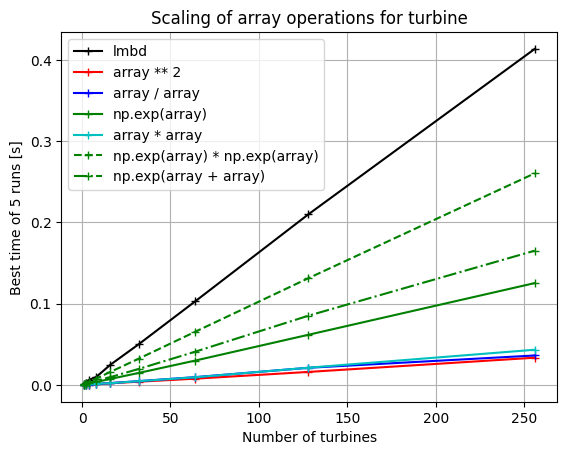

In [30]:
plt.figure()
plt.title("Scaling of array operations")
plt.xlabel("Size of left dimension")
plt.ylabel(f"Best time of {N} runs [s]")
plt.plot(turbine_scale, turbine_operation_times[0], marker="+", label="lbda = 1.0 * sigma_i ** 2 / S_i * np.exp(-Y_i) * np.exp(-Z_i)", color="k")
plt.plot(turbine_scale, turbine_operation_times[1], marker="+", label="array ** 2", color="r")
plt.plot(turbine_scale, turbine_operation_times[2], marker="+", label="array / array", color="b")
plt.plot(turbine_scale, turbine_operation_times[3], marker="+", label="np.exp(array)", color="g")
plt.plot(turbine_scale, turbine_operation_times[4], marker="+", label="array * array", color="c")
plt.plot(turbine_scale, turbine_operation_times[5], marker="+", label="np.exp(array) * np.exp(array)", color="g", linestyle="--")
plt.plot(turbine_scale, turbine_operation_times[6], marker="+", label="np.exp(array + array)", color="g", linestyle="-.")
plt.grid()
plt.legend()

**SUGGESTION: rewrite line 150 as lbda = sigma_i ** 2 / S_i * np.exp(-1 * (Y_i + Z_i))**

Takes a few percentage points off of this line in the line profiling

# Algorithmic suggestions

This loop is the bottleneck:
```python
        for m in range(0, ii - 1):
            x_coord_m = x_coord[:, m:m+1]
            y_coord_m = y_coord[:, m:m+1]
            z_coord_m = z_coord[:, m:m+1]

            # For computing cross planes, we don't need to compute downstream
            # turbines from out cross plane position.
            if x_coord[:, m:m+1].size == 0:
                break

            delta_x_m = x - x_coord_m

            sigma_i = wake_expansion(
                delta_x_m,
                turbine_Ct[:, m:m+1],
                turbine_ti[:, m:m+1],
                turbine_diameter[:, m:m+1],
                self.a_s,
                self.b_s,
                self.c_s1,
                self.c_s2,
            )

            S_i = sigma_n ** 2 + sigma_i ** 2

            Y_i = (y_i_loc - y_coord_m - deflection_field) ** 2 / (2 * S_i)
            Z_i = (z_i_loc - z_coord_m) ** 2 / (2 * S_i)

            lbda = 1.0 * sigma_i ** 2 / S_i * np.exp(-Y_i) * np.exp(-Z_i)

            sum_lbda = sum_lbda + lbda * (Ctmp[m] / u_initial)
```

This is looping over every upstream turbine for each iteration in the turbine loop. In other words,
this scales as `O(n^2)`. Is it possible to rewrite this to use a matrix operation instead?
Another suggestion is to find only the turbines that are actually up wind rather than all that have
a smaller x coordinate than the current turbine.